# AIN 214 - PA1 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 03.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/


# Necessary Imports

In [62]:
import numpy as np
import pandas as pd
from sqlite3 import connect
import sqlite3
import os



# Notes:
* Use pandas dataframe (df) to load the data.
* Use numpy or pandas operations for the requested tasks unless otherwise specified. Use of naive for loops is not considered valid.
* For the db operations, use sqlite3 library in Python

# 1st Set of Questions on Boston Housing Dataset **(30 Pts)**

* Retrieved from KAGGLE
* **Dataset Path: "Data/BostonHousing.csv"**

## Q1. Basic Data Exploration **(10 Pts)**
1. Load the data into Pandas DataFrame and print the column names. **(1 pts)**
2. Display the first and last 10 rows of the dataset. **(1 pts)**
3. Display random 10 rows. **(1 pts)**
4. Display random 10 rows with a seed, ie, it outputs the same random rows everytime it is run. **(1 pts)**
5. Display every 15th row. **(1 pts)**
6. Get the summary stats of the dataset regarding each column. **(2 pts)**
7. Identify and count the number of missing values in each column. **(3 pts)**

In [63]:

os.chdir(r'C:\Users\mbdn1\Desktop') # i change my directory to access the file.

"Data/BostonHousing.csv" i try to use this path but it did not work then i use "BostonHousing.csv" this path and it worked.

In [64]:
# Load the data into Pandas DataFrame and print the column names

BH_df = pd.read_csv("BostonHousing.csv") # i load the data file.

print(BH_df.columns) # i print columns name of Boston Housing Dataset.




Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [65]:
# Display the first and last 10 rows of the dataset.
print("first 10 rows")
print(BH_df.head(10))  # using head function i get first 10 rows.
print("\n") # I left spaces for easier understanding and visibility. 
print("last 10 rows")
print(BH_df.tail(10)) # using tail function i get last 10 rows.

first 10 rows
      crim    zn  indus  chas    nox     rm    age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  3

In [66]:
# Display the random 10 rows
print(BH_df.sample(10)) # using sample method to display randomly 10 rows.

        crim     zn  indus  chas    nox     rm   age     dis  rad  tax  \
136  0.32264    0.0  21.89     0  0.624  5.942  93.5  1.9669    4  437   
461  3.69311    0.0  18.10     0  0.713  6.376  88.4  2.5671   24  666   
57   0.01432  100.0   1.32     0  0.411  6.816  40.5  8.3248    5  256   
500  0.22438    0.0   9.69     0  0.585  6.027  79.7  2.4982    6  391   
334  0.03738    0.0   5.19     0  0.515  6.310  38.5  6.4584    5  224   
107  0.13117    0.0   8.56     0  0.520  6.127  85.2  2.1224    5  384   
459  6.80117    0.0  18.10     0  0.713  6.081  84.4  2.7175   24  666   
208  0.13587    0.0  10.59     1  0.489  6.064  59.1  4.2392    4  277   
196  0.04011   80.0   1.52     0  0.404  7.287  34.1  7.3090    2  329   
234  0.44791    0.0   6.20     1  0.507  6.726  66.5  3.6519    8  307   

     ptratio       b  lstat  medv  
136     21.2  378.25  16.90  17.4  
461     20.2  391.43  14.65  17.7  
57      15.1  392.90   3.95  31.6  
500     19.2  396.90  14.33  16.8  
334  

In [67]:
# sample using seed
print((BH_df.sample(10, random_state = 1))) # i use random_state parameter to ensure the reproducibility.

        crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
307  0.04932  33.0   2.18     0  0.472  6.849   70.3  3.1827    7  222   
343  0.02543  55.0   3.78     0  0.484  6.696   56.4  5.7321    5  370   
47   0.22927   0.0   6.91     0  0.448  6.030   85.5  5.6894    3  233   
67   0.05789  12.5   6.07     0  0.409  5.878   21.4  6.4980    4  345   
362  3.67822   0.0  18.10     0  0.770  5.362   96.2  2.1036   24  666   
132  0.59005   0.0  21.89     0  0.624  6.372   97.9  2.3274    4  437   
292  0.03615  80.0   4.95     0  0.411  6.630   23.4  5.1167    4  245   
31   1.35472   0.0   8.14     0  0.538  6.072  100.0  4.1750    4  307   
218  0.11069   0.0  13.89     1  0.550  5.951   93.8  2.8893    5  276   
90   0.04684   0.0   3.41     0  0.489  6.417   66.1  3.0923    2  270   

     ptratio       b  lstat  medv  
307     18.4  396.90   7.53  28.2  
343     17.6  396.90   7.18  23.9  
47      17.9  392.74  18.80  16.6  
67      18.9  396.21   8.10  22.0  
362  

In [68]:
# Display every 15th row
print(BH_df.iloc[::15]) # using slicing method '::' i got every 15th row.

         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
15    0.62739   0.0   8.14     0  0.538  5.834   56.5  4.4986    4  307   
30    1.13081   0.0   8.14     0  0.538  5.713   94.1  4.2330    4  307   
45    0.17142   0.0   6.91     0  0.448  5.682   33.8  5.1004    3  233   
60    0.14932  25.0   5.13     0  0.453  5.741   66.2  7.2254    8  284   
75    0.09512   0.0  12.83     0  0.437  6.286   45.0  4.5026    5  398   
90    0.04684   0.0   3.41     0  0.489  6.417   66.1  3.0923    2  270   
105   0.13262   0.0   8.56     0  0.520  5.851   96.7  2.1069    5  384   
120   0.06899   0.0  25.65     0  0.581  5.870   69.7  2.2577    2  188   
135   0.55778   0.0  21.89     0  0.624  6.335   98.2  2.1107    4  437   
150   1.65660   0.0  19.58     0  0.871  6.122   97.3  1.6180    5  403   
165   2.92400   0.0  19.58     0  0.605  6.101   93.0  2.2834    5  403   
180   0.06588   0.0   2.4

In [69]:
# Get the summary stats of the dataset regarding each column
print(BH_df.describe()) # describe method give summaries for columns.

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [70]:
# Identify and count the number of missing values in each column
print(BH_df.isnull().sum()) # i use isnull() method if there is not a value or Nan value.Then use sum() for count NaN values.

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


## Q2. Data Filtering (10 pts)

1. Extract records where the rm (average number of rooms per dwelling) >= 7.   **(2 pts)**
2. Extract records located along the Charles River (chas = 1) and have a crime rate (crim) less than the median crime rate of the dataset.  **(2 pts)**
3. Identify neighborhoods where the average rm is greater than 6, the lstat (% lower status of the population) is below 10, and the medv is above the 75th percentile of the dataset. This would give neighborhoods with relatively larger homes, lower "lower-status" population percentage, and higher median values.  **(2 pts)**
4. Identify records where the dis (weighted distances to five Boston employment centers) is in the top 10% of the dataset and the nox (nitric oxides concentration) is in the bottom 10%, indicating neighborhoods that are farther from employment centers and have cleaner air.  **(2 pts)**
5. From the houses built before 1940 (AGE column), select those which fall in the top 20% in terms of nitric oxide concentrations (NOX). From this subset, retrieve the bottom 10 records with the lowest MEDV values.  **(2 pts)**

In [71]:
# Extract records where the rm >= 7
print(BH_df[BH_df['rm'] >= 7]) 
""" [BH_df['RM'] >= 7] this part return a boolean value if is true we took this part from dataframe"""

         crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
2     0.02729   0.0   7.07     0  0.4690  7.185  61.1  4.9671    2  242   
4     0.06905   0.0   2.18     0  0.4580  7.147  54.2  6.0622    3  222   
40    0.03359  75.0   2.95     0  0.4280  7.024  15.8  5.4011    3  252   
55    0.01311  90.0   1.22     0  0.4030  7.249  21.9  8.6966    5  226   
64    0.01951  17.5   1.38     0  0.4161  7.104  59.5  9.2229    3  216   
..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
364   3.47428   0.0  18.10     1  0.7180  8.780  82.9  1.9047   24  666   
370   6.53876   0.0  18.10     1  0.6310  7.016  97.5  1.2024   24  666   
375  19.60910   0.0  18.10     0  0.6710  7.313  97.9  1.3163   24  666   
453   8.24809   0.0  18.10     0  0.7130  7.393  99.3  2.4527   24  666   
482   5.73116   0.0  18.10     0  0.5320  7.061  77.0  3.4106   24  666   

     ptratio       b  lstat  medv  
2       17.8  392.83   4.03  34.7  
4       18.7  396.90   5.33

" [BH_df['RM'] >= 7] this part return a boolean value if is true we took this part from dataframe"

In [72]:
# Extract records located along the Charles River (chas = 1) and have a crime rate (crim) less than the median crime rate of the dataset.
""" i use median() method to reach dataset's crim median value. Then i use basic logic"""
print(BH_df[(BH_df['chas'] == 1) & (BH_df['crim'] < BH_df['crim'].median())])

        crim    zn  indus  chas     nox     rm   age     dis  rad  tax  \
208  0.13587   0.0  10.59     1  0.4890  6.064  59.1  4.2392    4  277   
210  0.17446   0.0  10.59     1  0.4890  5.960  92.1  3.8771    4  277   
212  0.21719   0.0  10.59     1  0.4890  5.807  53.8  3.6526    4  277   
216  0.04560   0.0  13.89     1  0.5500  5.888  56.0  3.1121    5  276   
218  0.11069   0.0  13.89     1  0.5500  5.951  93.8  2.8893    5  276   
219  0.11425   0.0  13.89     1  0.5500  6.373  92.4  3.3633    5  276   
269  0.09065  20.0   6.96     1  0.4640  5.920  61.5  3.9175    3  223   
273  0.22188  20.0   6.96     1  0.4640  7.691  51.8  4.3665    3  223   
274  0.05644  40.0   6.41     1  0.4470  6.758  32.9  4.0776    4  254   
276  0.10469  40.0   6.41     1  0.4470  7.267  49.0  4.7872    4  254   
277  0.06127  40.0   6.41     1  0.4470  6.826  27.6  4.8628    4  254   
282  0.06129  20.0   3.33     1  0.4429  7.645  49.7  5.2119    5  216   
283  0.01501  90.0   1.21     1  0.401

In [73]:
# Identify neighborhoods where the average rm is greater than 6, the lstat (% lower status of the population) is below 10, and the medv is above
# the 75th percentile of the dataset.
""" I used similar logic as above cell. i choose 25.0 from describe functions output '1st set of questions Q1 question 6' of 75% which equals to 25.0 """
print(BH_df[(BH_df['rm'] > 6) & (BH_df['lstat'] < 10) & (BH_df['medv'] > 25.0)])





        crim    zn  indus  chas    nox     rm    age      dis  rad  tax  \
2    0.02729   0.0   7.07     0  0.469  7.185   61.1   4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998   45.8   6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147   54.2   6.0622    3  222   
5    0.02985   0.0   2.18     0  0.458  6.430   58.7   6.0622    3  222   
39   0.02763  75.0   2.95     0  0.428  6.595   21.8   5.4011    3  252   
..       ...   ...    ...   ...    ...    ...    ...      ...  ...  ...   
349  0.02899  40.0   1.25     0  0.429  6.939   34.5   8.7921    1  335   
353  0.01709  90.0   2.02     0  0.410  6.728   36.1  12.1265    5  187   
369  5.66998   0.0  18.10     1  0.631  6.683   96.8   1.3567   24  666   
370  6.53876   0.0  18.10     1  0.631  7.016   97.5   1.2024   24  666   
371  9.23230   0.0  18.10     0  0.631  6.216  100.0   1.1691   24  666   

     ptratio       b  lstat  medv  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94

In [74]:
# Identify records where the dis (weighted distances to five Boston employment centers) is in the top 10% of the dataset and the nox
# (nitric oxides concentration) is in the bottom 10%
""" here i use pandas quantile() method to get some part of data. """
top_10th = BH_df['dis'].quantile(0.9)
bottom_10th = BH_df['nox'].quantile(0.1)
print(BH_df[(BH_df['dis'] >= top_10th) & (BH_df['nox'] <= bottom_10th) ])



        crim     zn  indus  chas     nox     rm   age      dis  rad  tax  \
54   0.01360   75.0   4.00     0  0.4100  5.888  47.6   7.3197    3  469   
55   0.01311   90.0   1.22     0  0.4030  7.249  21.9   8.6966    5  226   
56   0.02055   85.0   0.74     0  0.4100  6.383  35.7   9.1876    2  313   
57   0.01432  100.0   1.32     0  0.4110  6.816  40.5   8.3248    5  256   
64   0.01951   17.5   1.38     0  0.4161  7.104  59.5   9.2229    3  216   
196  0.04011   80.0   1.52     0  0.4040  7.287  34.1   7.3090    2  329   
197  0.04666   80.0   1.52     0  0.4040  7.107  36.6   7.3090    2  329   
198  0.03768   80.0   1.52     0  0.4040  7.274  38.3   7.3090    2  329   
199  0.03150   95.0   1.47     0  0.4030  6.975  15.3   7.6534    3  402   
200  0.01778   95.0   1.47     0  0.4030  7.135  13.9   7.6534    3  402   
254  0.04819   80.0   3.64     0  0.3920  6.108  32.0   9.2203    1  315   
255  0.03548   80.0   3.64     0  0.3920  5.876  19.1   9.2203    1  315   
284  0.00906

In [75]:
# From the houses built before 1940 (age column), select those which fall in the top 20% in terms of nitric oxide concentrations (nox). From this subset,
# retrieve the bottom 10 records with the lowest medv values.
before_1940 = BH_df[BH_df['age'] < 1940] # i select the houses built before 1940.
top_20th = before_1940['nox'].quantile(0.8) # i took upper part of %20 of nitric oxide concentrations.

print(before_1940[before_1940['nox'] >= top_20th].nsmallest(10, 'medv')) # i use nmallest pandas method to get rows with the smallest values in a specified column.





         crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
398  38.35180  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
405  67.92080  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   
400  25.04610  0.0   18.1     0  0.693  5.987  100.0  1.5888   24  666   
399   9.91655  0.0   18.1     0  0.693  5.852   77.8  1.5004   24  666   
414  45.74610  0.0   18.1     0  0.693  4.519  100.0  1.6582   24  666   
385  16.81180  0.0   18.1     0  0.700  5.277   98.1  1.4261   24  666   
401  14.23620  0.0   18.1     0  0.693  6.343  100.0  1.5741   24  666   
415  18.08460  0.0   18.1     0  0.679  6.434  100.0  1.8347   24  666   
387  22.59710  0.0   18.1     0  0.700  5.000   89.5  1.5184   24  666   
416  10.83420  0.0   18.1     0  0.679  6.782   90.8  1.8195   24  666   

     ptratio       b  lstat  medv  
398     20.2  396.90  30.59   5.0  
405     20.2  384.97  22.98   5.0  
400     20.2  396.90  26.77   5.6  
399     20.2  338.16  29.97   6.3  
414  

## Q3. Calculate the average per capita crime rate (crim) for each category, "Low", "Medium" or "High" of pupil-teacher ratio (ptratio). **(10 Pts)**
The ptratio is categorized into
* Low if ptratio <= 15
* Medium if 15 < ptratio <= 20
* High if ptratio > 20

In [76]:
#  Calculate the average per capita crime rate (crim) for each category, "Low", "Medium" or "High" of pupil-teacher ratio (ptratio)
""" first i create pandas series to get categories then i use mean() function from describe function() to get average of crim
category for every category of pupil-teacher ratio. """
low = BH_df["ptratio"] <= 15.0 # i create low category
medium = (15 < BH_df["ptratio"]) & (BH_df["ptratio"] <= 20.0) # i create medium category
high = BH_df["ptratio"] > 20.0 # i create high category

print("average per capita crime rate for low category =",end=" ")
print(BH_df[low].crim.mean()) # average per capita crime rate for low category.
print("average per capita crime rate for medium category =",end=" ")
print(BH_df[medium].crim.mean()) # average per capita crime rate for medium category.
print("average per capita crime rate for high category =",end=" ")
print(BH_df[high].crim.mean()) # average per capita crime rate for high category.







average per capita crime rate for low category = 1.2355291379310342
average per capita crime rate for medium category = 0.1584158704453441
average per capita crime rate for high category = 8.545539850746271


In [77]:
# 2nd Set of Questions on the shot1.csv and shot2.csv Datasets **(30 Pts)**

# * **Dataset Path: "Data/shot1.csv" and "Data/shot2.csv"**

## Q1. Data Merging and Consistency Checking **(10 Pts)**

* Combine the data from "shot1.csv" and "shot2.csv" into a single DataFrame, ensuring no redundant columns are present. Merge by the redundant column names, representing the same info with different naming.
*  After merging, perform a consistency check for any duplicated rows and provide a summary of your findings. Give the details (avg, mean, etc) of each feature.

In [78]:
# read csv s into dfs

import glob # using glob the way i chose to get single dataframe.
df_lst = []

# list of file i want to read.
files_to_get_single_df = ['shot1.csv', 'shot2.csv']

# iterate 
for file in files_to_get_single_df:
    file_path = r'C:\Users\mbdn1\Desktop\\' + file
    
    # Read each file to df and append them to df_lst
    df = pd.read_csv(file_path)
    df_lst.append(df)

# concatanate in a single df
combined_df = pd.concat(df_lst, ignore_index=True) # ignore index part is about the index from the original dataframes in df_lst will be ignored

In [79]:
# merge dfs, removing redundant columns
redundant_columns = ['GAME_ID', 'GAME_IDENTIFICATION'] # I determined the redundant columns.

#  i create a dictionary to map the redundant column names to a common name which is ID_GAME.
column_mapping = {'GAME_ID': 'ID_GAME', 'GAME_IDENTIFICATION': 'ID_GAME'}

# rename the columns in combined_df to match the common name
combined_df = combined_df.rename(columns=column_mapping) # rename() is a way for rename columns.
combined_df.head()


,ID_GAME,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_RESULT,ID_GAME,PTS_TYPE,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899.0,"MAR 04, 2015 - CHA @ BKN",A,W,24.0,1.0,1.0,1:09,10.8,2.0,...,made,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21400899.0,"MAR 04, 2015 - CHA @ BKN",A,W,24.0,2.0,1.0,0:14,3.4,0.0,...,missed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21400899.0,"MAR 04, 2015 - CHA @ BKN",A,W,24.0,3.0,1.0,0:00,NaN,3.0,...,missed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21400899.0,"MAR 04, 2015 - CHA @ BKN",A,W,24.0,4.0,2.0,11:47,10.3,2.0,...,missed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21400899.0,"MAR 04, 2015 - CHA @ BKN",A,W,24.0,5.0,2.0,10:34,10.9,2.0,...,missed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# check for duplicate rows and provide a summary of the findings for each feature
rows_are_duplicate = combined_df[combined_df.duplicated()] # rows_are_duplicate is dataframe which contain duplicated rows of combined_df.
num_of_duplicate = len(rows_are_duplicate) # number of duplicated rows.
print("Summary of the findings")
print("")
print("Number of Duplicated Rows:", num_of_duplicate)
print("")
print(combined_df.describe()) # summary of combined_df.

Summary of the findings

Number of Duplicated Rows: 31

            ID_GAME   FINAL_MARGIN    SHOT_NUMBER         PERIOD  \
count  1.280690e+05  128069.000000  128069.000000  128069.000000   
mean   2.140045e+07       0.208723       6.506899       2.469427   
std    2.578773e+02      13.233267       4.713260       1.139919   
min    2.140000e+07     -53.000000       1.000000       1.000000   
25%    2.140023e+07      -8.000000       3.000000       1.000000   
50%    2.140045e+07       1.000000       5.000000       2.000000   
75%    2.140067e+07       9.000000       9.000000       3.000000   
max    2.140091e+07      53.000000      38.000000       7.000000   

          SHOT_CLOCK       DRIBBLES     TOUCH_TIME      SHOT_DIST  \
count  122502.000000  128069.000000  128069.000000  256138.000000   
mean       12.453344       2.023355       2.765901      13.571504   
std         5.763265       3.477760       3.043682       8.888946   
min         0.000000       0.000000    -163.600000     

# Q2. Player’s Shooting Accuracy Analysis **(10 Pts)**
* Using the combined DataFrame from Question 1, calculate and display the shooting accuracy of each player.
* Shooting accuracy = the ratio of successful shots (SHOT_RESULT) to total shots taken
* Display the top 5 players based on shooting accuracy

In [81]:

player_group = combined_df.groupby("player_name") # i separated combined_df to player_name groups.

print(player_group["FGM"].mean()) #i use another way to display shooting accuracy of each player.
#  FGM represents the number of baskets of a player has successfully made.
# analyzing the mean "FGM" for each player i am gonna know their scoring ability and shooting accuracy. 
 



player_name
aaron brooks       0.415330
aaron gordon       0.528846
al farouq aminu    0.430233
al horford         0.541259
al jefferson       0.477500
                     ...   
wesley matthews    0.449198
wilson chandler    0.414734
zach lavine        0.423181
zach randolph      0.488823
zaza pachulia      0.431429
Name: FGM, Length: 281, dtype: float64


In [82]:
print(player_group["FGM"].mean().sort_values(ascending = False).head()) # i sort top 5 player in descending order and display five top players.

player_name
deandre jordan    0.712468
tyson chandler    0.676471
rudy gobert       0.625468
greg smith        0.617021
james johnson     0.614148
Name: FGM, dtype: float64


# Q3. Analyze the Relationship between shooting distance (SHOT_DIST) and shooting success (SHOT_RESULT). **(10 Pts)**
* Bin the shots into categories based on distance. **STATE AND REASON ABOUT YOUR LOGIC HERE!** (How to apply binning)

first i find combined_df's max min mean and median value. then i use max and min to find range after that i divided range by mean then i round finding results to bin value.We just learned the concept of bin in our Statistic course but i did not learn in detail i learn that bining must be good categorized for visibility when i try this way it looks good so i did this.
* Calculate the shooting accuracy for each bin.
* **COMMENT** on your findinds.

SHOT_CATEGORY
0-3      0.635819
4-7      0.484063
8-11     0.393686
12-15    0.416071
16-19    0.411277
20-23    0.380096
24-27    0.344877
28-31    0.206506
32-35    0.087209
36-39    0.076190
40-43    0.011111
44-47    0.052632
Name: SHOT_RESULT, dtype: float64


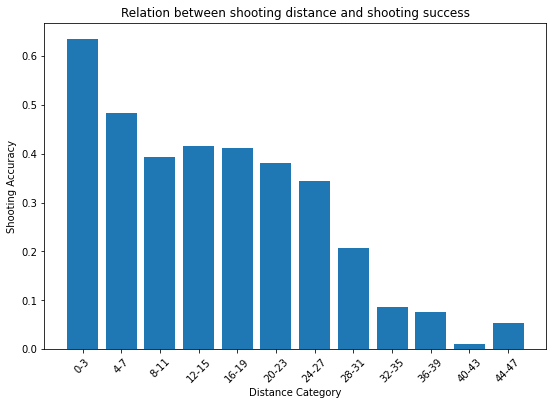

In [83]:
import matplotlib.pyplot as plt

mybin = range(0, 49, 4) # bins with a width of 4 then  i use this to make SHOT_CATEGORY' s index.
mylabel = [f'{i}-{i+3}' for i in range(0, 48, 4)] 
""" i use list comprehension to create list in easier way then i use mylabel to set label name's. """

# i create a new column in combine_df to see shot categories.
combined_df['SHOT_CATEGORY'] = pd.cut(combined_df['SHOT_DIST'], bins=mybin, labels=mylabel)

# i calculate shooting accuracy for each bin i use mean method.
shooting_accuracy = combined_df.groupby('SHOT_CATEGORY')['SHOT_RESULT'].apply(lambda x: (x == 'made').mean())
print(shooting_accuracy)

# plot for shooting accuracy and shooting distance
plt.figure(figsize=(9, 6))
plt.bar(shooting_accuracy.index, shooting_accuracy)
plt.title('Relation between shooting distance and shooting success')
plt.xlabel('Distance Category')
plt.ylabel('Shooting Accuracy')
plt.xticks(rotation=45) # to easier reading
plt.show()


# 3rd Set of Questions on SQL - **using sqlite3 library!** **(40 Pts)**

* **Dataset Path: "Data/annots.csv"**

Here you are given a file: annots.csv, with the protein - gene ontology (GO) term associations/annotations. Gene ontology is a framework, representing the properties of genes and proteins. This is basically a Graph - more spesifically a directed acyclic graph (DAG), representing a level-ordered hierarchy with three subgraphs: MF, CC, and BP. Here, **each** node in the graph, which we term as **"GO Term" corresponds to a function of a protein.**

* If protein is annotated with a GO Term, then the protein has the function represented by this GO Term.
* A protein can be and most of the time is annotated with multiple GO terms, and vice versa.

In the annots.csv file, we have the annotation data, where each row corresponds to a protein - GO term annotation with the following columns: ProteinID,ProtSeq, GO_ID, Sub_Graph, Level. ProteinID is the specifier of the protein and the ProtSeq is the aminoacid sequence of this protein. GO_ID, Sub_Graph, and Level are properties of a GO Term.

**Now, we want to store this data in a relational database, with the following table schemas:**

## Table 1: GoTerms:

| Column   | Type    | Key        | Description                |
|----------|---------|------------|----------------------------|
| GoID     | TEXT    | PRIMARY KEY| Gene Ontology Identifier   |
| SubGraph | TEXT    |            | Subgraph Type (BP, MF, CC) |
| Level    | INTEGER |            | Ontology level             |


## Table 2: Proteins

| Column     | Type | Key        | Description                |
|------------|------|------------|----------------------------|
| ProteinID  | TEXT | PRIMARY KEY| Unique Protein Identifier  |
| ProtSeq  | TEXT | | Amino Acid Sequence |

## Table 3: Annotations

| Column    | Type | Key                       | Description               |
|-----------|------|---------------------------|---------------------------|
| GoID      | TEXT | PRIMARY KEY, FOREIGN KEY  | Gene Ontology Identifier  |
| ProteinID | TEXT | PRIMARY KEY, FOREIGN KEY  | Unique Protein Identifier |


## Q1. Read the csv file and create this DB  **(10 Pts)**

In [123]:
# read file into db and create a db using sqlite3

annots_df = pd.read_csv("annots.csv")
conn = sqlite3.connect("annots_db.sqlite")
cursor = conn.cursor()
# Store the DataFrame as a table in the SQLite database
annots_df.to_sql('annots', conn, if_exists='replace', index=False)
pd.read_sql('SELECT * FROM annots LIMIT 5', conn)


,ProteinID,ProtSeq,GO_ID,Sub_Graph,Level
0,A0A0E4AZF8,VDDIQEKMNKELGCIKVTFPGADGQGEDACLKDIPVSLISTYFART...,GO:0005488,MF,1
1,A0A075B6K5,FDEAEHAHTYLRERIEVRLMTASESLMGERLGLMMGVCYEHFKGCG...,GO:0019814,CC,2
2,A0A097ZPG2,NCLLPFHFDGRQPFWTGADCMFAFLMCDYSGAMCECTGCHWPHQEG...,GO:0004499,MF,5
3,A0A097ZPD9,QFEGITCPMDPCRPCAWWIARYSYHWLPIHRGSECQGLYMKPPDYQ...,GO:0006629,BP,3
4,A0A0C4DH36,GNGGHVTILYAYGAMHRHQMVRCYHWVGVTRV,GO:0002250,BP,3


In [128]:
# Create the "GoTerms" table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS GoTerms (
        Column TEXT,
        Type TEXT,
        Key PRIMARY KEY,
        Description TEXT
    )
''')


# Create the "Proteins" table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Proteins (
        Column TEXT,
        Type TEXT,
        Key PRIMARY KEY,
        Description TEXT
    )
''')

# Create the "Annotations" table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Annotations (
        Column TEXT,
        Type TEXT,
        Key PRIMARY KEY,
        Description TEXT
    )
''')
pd.read_sql('''
SELECT *
FROM GoTerms
''', conn)


,Column,Type,Key,Description


In [140]:
goterms_data = [
    ("GoID","TEXT","PRIMARY KEY","Gene Ontology Identifier"),
    ("SubGraph","TEXT","","Subgraph Type (BP, MF, CC)"),
    ("Level","INTEGER","","Ontology level")
]
cursor.executemany("INSERT OR IGNORE INTO GoTerms VALUES (?, ?, ?, ?)", goterms_data,)
pd.read_sql('''
SELECT *
FROM GoTerms
''', conn)


,Column,Type,Key,Description
0,GoID,TEXT,PRIMARY KEY,Gene Ontology Identifier
1,SubGraph,TEXT,,"Subgraph Type (BP, MF, CC)"


In [141]:
proteins_data = [
    ("ProteinID","TEXT","PRIMARY KEY","Unique Protein Identifier"),
    ("ProtSeq","TEXT","","Amino Acid Sequence")
]
cursor.executemany("INSERT OR IGNORE INTO Proteins VALUES (?, ?, ?, ?)", proteins_data,)
pd.read_sql('''
SELECT *
FROM Proteins
''', conn)


,Column,Type,Key,Description
0,ProteinID,TEXT,PRIMARY KEY,Unique Protein Identifier
1,ProtSeq,TEXT,,Amino Acid Sequence


In [144]:
annotations_data = [
    ("GoID","TEXT","PRIMARY KEY, FOREIGN KEY","Gene Ontology Identifier"),
    ("ProteinID","TEXT","PRIMARY KEY, FOREIGN KEY","Unique Protein Identifier")
]
cursor.executemany("INSERT OR IGNORE INTO Annotations VALUES (?, ?, ?, ?)", annotations_data,)
pd.read_sql('''
SELECT *
FROM Annotations
''', conn)


,Column,Type,Key,Description
0,GoID,TEXT,"PRIMARY KEY, FOREIGN KEY",Gene Ontology Identifier


## Q2. Define a function to extract all GO terms associated with a given amino acid sequence (ProtSeq), ensuring that the GO terms satisfy the following criteria: they are annotated with at least 50 proteins in MF and CC subgraphs, and 100 proteins in the BP subgraph.. **(10 Pts)**

In [26]:
prot_seq = "WYTWADEAHAKNIVMCFRMHGEAYEKAAVYMNRSPEFMGCRADNNDEYDV" #  example protein sequence

# function to extract the annotated GO terms with the above specs
def extract_go_terms(prot_seq):
    results = []
    # ADD YOUR CODE HERE
    return results

## Q3. Print the averge number of annotations a GO terms has for each level in each subgraph (MF, CC, and BP) **(10 Pts)**

In [27]:
# Print the avg # of annots


## Q4. Identify the ProteinID with the longest ProtSeq within the Proteins table. Modify its ProtSeq to half its original length by trimming the sequence, update the ProteinID to "trimmed", and display the updated ProteinID and ProtSeq with its GO Term annotations. **(10 Pts)**

In [28]:
# find and trim the longest sequence, displaying the updated ProtID and ProtSeq, and its annotated GO Terms

# PLAGIARISM
All work on assignments must be done individually. You are encouraged to discuss
the given assignments with your classmates, but these discussions should be carried out
in an abstract way. That is, discussions related to a particular solution to a specific prob-
lem (either in actual code or in pseudocode) will not be tolerated. In short, turning
in someone else’s work (including work available on the internet), in whole or in part, as
your own will be considered as a violation of academic integrity. Please note that the
former conditions also hold for the material attained using AI tools, including ChatGPT,
GitHub Copilot, etc.

# ACKNOWLEDGEMENT
In certain sections of this study, I utilized the AI tool ChatGPT, AIN212 course slides, AIN214 lab materials
and Google translate to enhance my understanding.